### About this Dataset:
#### Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## Netflix Tv shows and Movies Data Analysis

### Tasks: 
#### How many Movies & TV Shows are in the dataset ? Show with Bar Graph.
#### -For 'Midnight Mass', what is the Show Id and Who is the Director of this show ?
#### -In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.
#### -Show only the Titles of all TV Shows that were released in India only.
#### -Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?
#### -Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".
#### -What are the different Ratings defined by Netflix ?
#### -Which individual country has the Highest No. of TV Shows ?
#### -How can we sort the dataset by Year ?
#### -Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  ### Loading Dataset      

In [3]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Data Exploration

In [3]:
# It shows index,columns,data types of each column,memory at once.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
#first n rows in the data(by default n=5)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#total number of rows and columns in data
df.shape

(8807, 12)

In [7]:
#number of total values in the dataset.
df.size

105684

In [8]:
#name of all columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
#data-type of each column
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [4]:
df[['country']].value_counts()

country                                                                            
United States                                                                          2818
India                                                                                   972
United Kingdom                                                                          419
Japan                                                                                   245
South Korea                                                                             199
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong     

In [11]:
#count of total number of unique values in the series.
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [12]:
#count of duplicate values in dataset
df.duplicated().sum()

0

#### There is no any duplicate value in dataset.

In [3]:
#check where null value is present
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Remove Null values.

In [4]:
df.fillna({"director":"Missing","cast":"Missing","country":"Unavailable","date_added":"Unavailable",
           "rating":"Unavailable","duration":"Unavailable","month":"Unavailable","year":"Unavailable"},inplace=True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [5]:
df.groupby('title').get_group( 'Midnight Mass')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


### Conclusion:
####         It show_id is s6 and director of the show 'Midnight Mass' is Mike Flanagan.

In [6]:
#To group unique items of a columns and show their items
type_count=df.groupby('type').type.count()
type_count

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'No. of Movies & TV Shows')

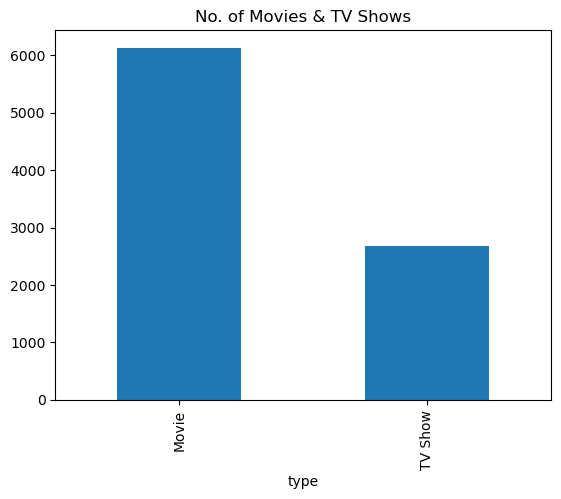

In [18]:
type_count.plot(kind='bar')
plt.title('No. of Movies & TV Shows')

### Conclusion:
#### count of movies are 6131 and TV show are 2676.From above graph conclude that the count of movies are more as compared to TV shows.

In [19]:
# first 5 records of release_year column
counts_release_year=df['release_year'].value_counts()
counts_release_year.head()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: release_year, dtype: int64

Text(0.5, 0, 'Release year of Movies and TV Shows')

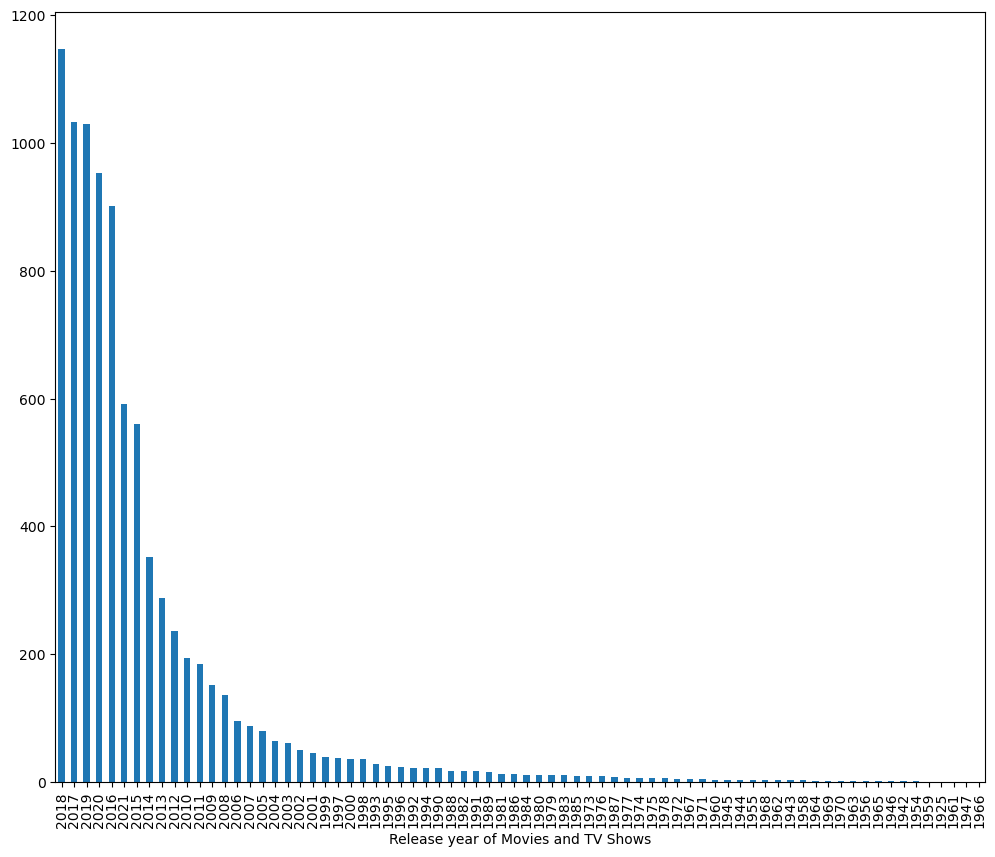

In [20]:
plt.figure(figsize=(12,10))
counts_release_year.plot(kind='bar')
plt.xlabel('Release year of Movies and TV Shows')

### Conclusion:
#### In the year 2018 the highest number of TV shows & Movies were released

In [11]:
#diffrent ratings defined by Netflix
pi = df.rating.unique()
pi

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [23]:
#Total count of ratings
df.rating.nunique()

18

Text(0.5, 1.0, 'Distribution Of Rating')

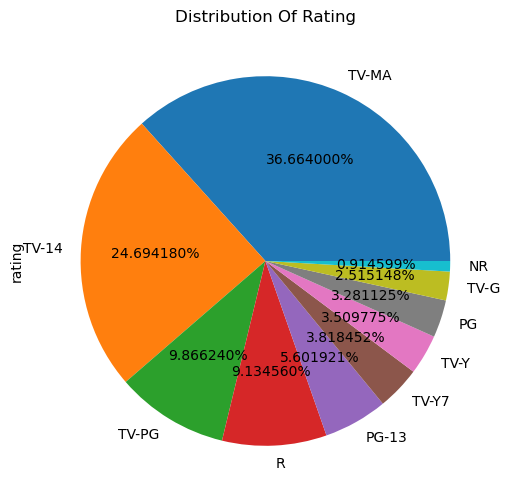

In [18]:
plt.figure(figsize = (10,6))
df['rating'].value_counts()[:10].plot(kind ="pie",autopct='%f%%')
plt.title('Distribution Of Rating')

In [28]:
#popular TV Shows that were released in India only
df[(df['country']=='India')&(df['type']=='TV Show')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
39,s40,TV Show,Chhota Bheem,Missing,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
50,s51,TV Show,Dharmakshetra,Missing,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,Missing,Missing,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
69,s70,TV Show,Stories by Rabindranath Tagore,Missing,Missing,India,"September 15, 2021",2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...
...,...,...,...,...,...,...,...,...,...,...,...,...
8173,s8174,TV Show,Thackeray,Missing,Missing,India,"May 25, 2019",2019,TV-MA,1 Season,TV Shows,From controversial cartoonist to powerful Mumb...
8235,s8236,TV Show,The Calling,Bumpy,Missing,India,"April 1, 2019",2018,TV-MA,1 Season,"International TV Shows, Reality TV",Food-crazed travel junkies journey across Indi...
8321,s8322,TV Show,The Golden Years with Javed Akhtar,Missing,Missing,India,"June 1, 2017",2016,TV-G,1 Season,"Docuseries, International TV Shows","Writer, poet and lyricist Javed Akhtar hosts t..."
8349,s8350,TV Show,The House That Made Me,Missing,Vinay Pathak,India,"March 31, 2017",2015,TV-PG,3 Seasons,"International TV Shows, Reality TV","With host Vinay Pathak, Indian celebrities ret..."


In [33]:
#Individual country has the highest no. of TV shows
df.groupby('type').get_group('TV Show')['country'].value_counts().head(1)

United States    760
Name: country, dtype: int64

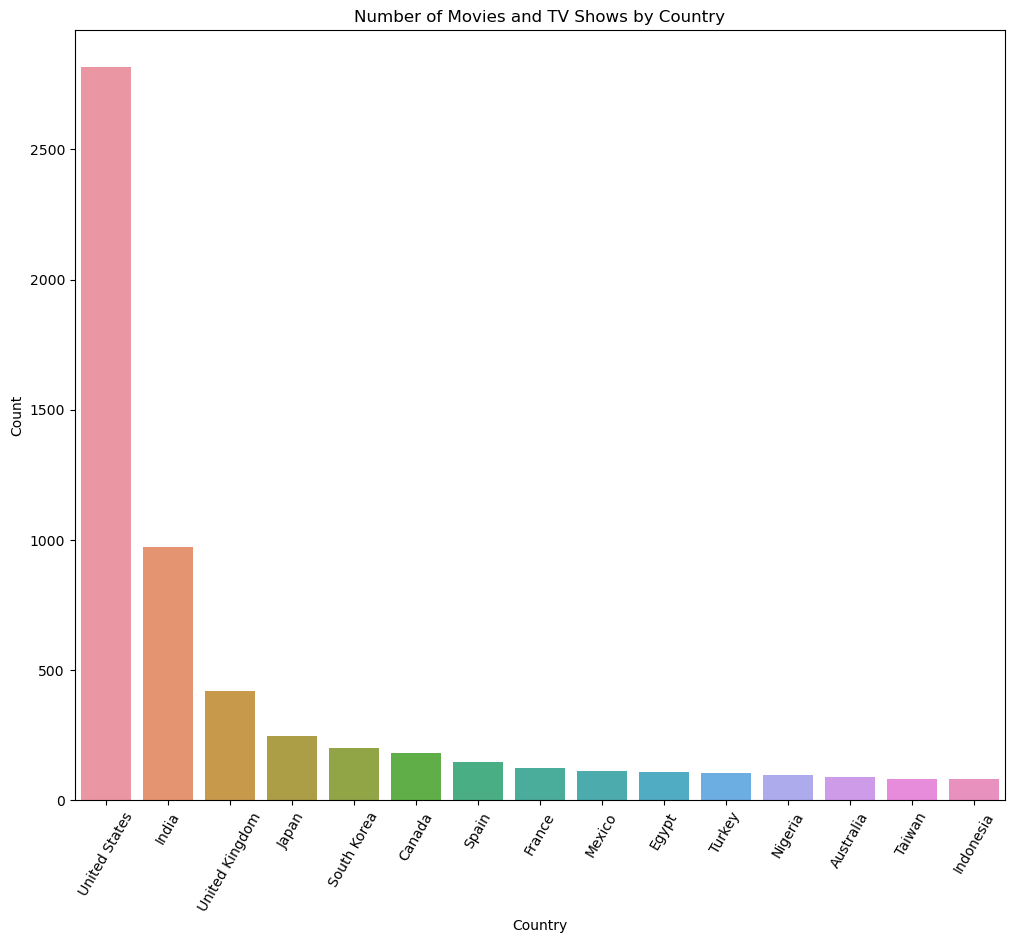

In [21]:
plt.figure(figsize=(12,10))
sns.countplot(x='country', data=df, order=df['country'].value_counts().index[:15])
plt.xticks(rotation=60)
plt.title('Number of Movies and TV Shows by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

#### Here in united states having highest number of TV Shows

In [34]:
#Top 10 directors which gave max no of shows.
df["director"].value_counts().head(10)

Missing                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: director, dtype: int64

In [36]:
df[(df['type']=='Movie')&(df['listed_in']=='Comedies')&(df['country']=='United Kingdom')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3332,s3333,Movie,Christmas Survival,James Dearden,"Julian Ovenden, Gemma Whelan, Joely Richardson...",United Kingdom,"November 1, 2019",2018,TV-MA,101 min,Comedies,"With Christmas just around the corner, sisters..."
4544,s4545,Movie,"Monty Python Live (Mostly): One Down, Five to Go",Eric Idle,"John Cleese, Terry Gilliam, Eric Idle, Terry J...",United Kingdom,"October 2, 2018",2014,TV-MA,137 min,Comedies,"Live from London in a sold-out final show, sur..."
4547,s4548,Movie,Monty Python: Live at The Hollywood Bowl,"Terry Hughes, Ian MacNaughton","Graham Chapman, John Cleese, Terry Gilliam, Er...",United Kingdom,"October 2, 2018",1982,R,80 min,Comedies,Film clips and Terry Gilliam animations featur...
4554,s4555,Movie,Parrot Sketch Not Included: Twenty Years of Mo...,Ian MacNaughton,"Steve Martin, John Cleese, Graham Chapman, Ter...",United Kingdom,"October 2, 2018",1989,TV-14,72 min,Comedies,"Presented by Steve Martin, this anthology draw..."
6576,s6577,Movie,Dead in a Week (Or Your Money Back),Tom Edmunds,"Tom Wilkinson, Aneurin Barnard, Freya Mavor, M...",United Kingdom,"March 1, 2019",2018,TV-MA,90 min,Comedies,After several failed attempts at taking his ow...
6779,s6780,Movie,For Love or Money,Mark Murphy,"Robert Kazinsky, Samantha Barks, Ed Speleers, ...",United Kingdom,"August 16, 2019",2019,TV-MA,95 min,Comedies,When a goofy but likable millionaire discovers...
8201,s8202,Movie,The Bad Education Movie,Elliot Hegarty,"Jack Whitehall, Joanna Scanlan, Iain Glen, Eth...",United Kingdom,"December 15, 2018",2015,TV-MA,87 min,Comedies,Britain's most ineffective but caring teacher ...
8536,s8537,Movie,The Trip to Spain,Michael Winterbottom,"Steve Coogan, Rob Brydon, Marta Barrio, Claire...",United Kingdom,"December 12, 2017",2016,TV-MA,108 min,Comedies,Comedians Steve Coogan and Rob Brydon gorge on...


In [35]:
#sorted dataset by year
df.sort_values(['release_year']).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,Missing,Missing,Unavailable,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
7790,s7791,Movie,Prelude to War,Frank Capra,Missing,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,Missing,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",Missing,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...


In [37]:
data1=df["listed_in"].value_counts()[:10]
data1

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

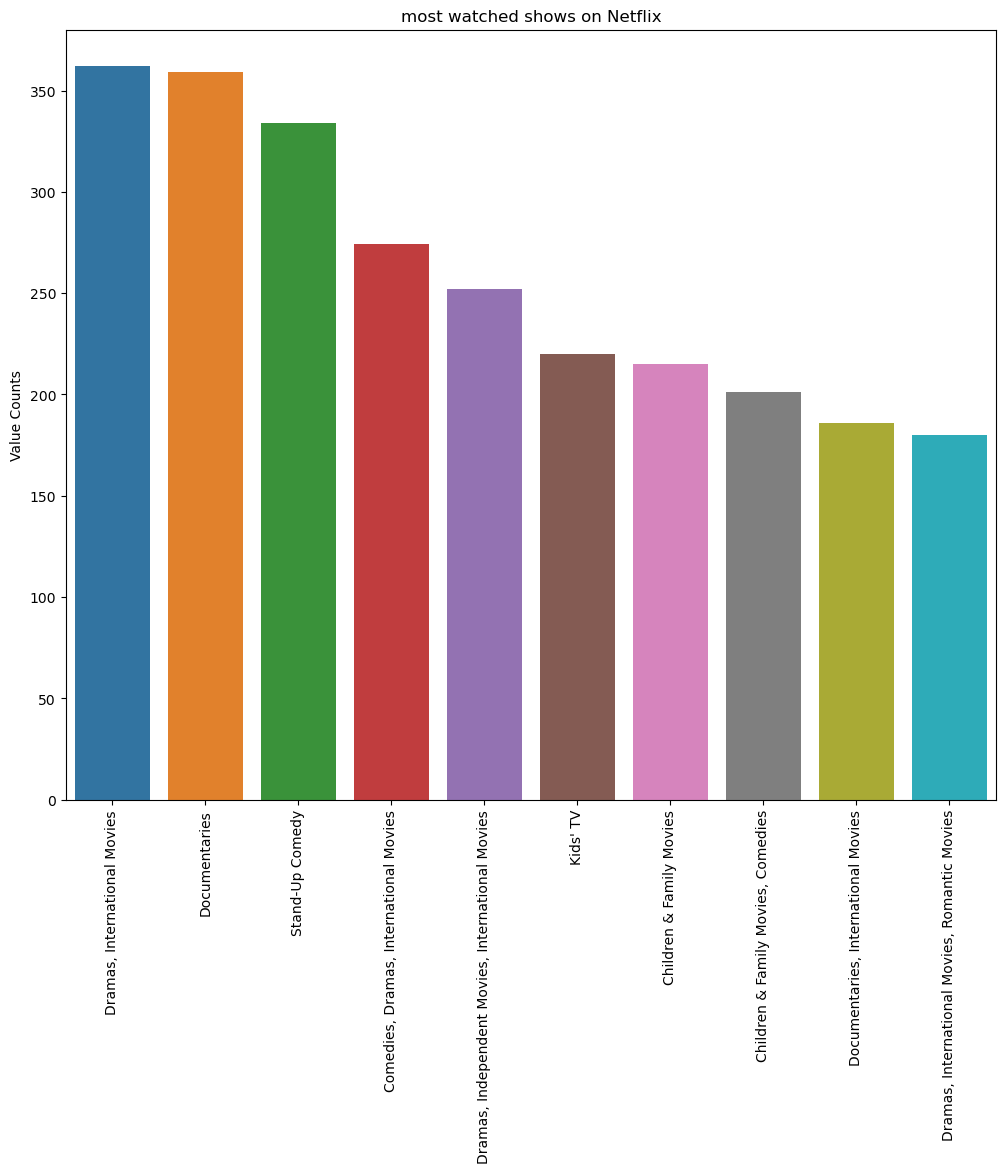

In [38]:
plt.figure(figsize=(12,10))
sns.barplot(x=data1.index, y=data1)
plt.ylabel('Value Counts')
plt.xticks(rotation=90)
plt.title('most watched shows on Netflix')
plt.show

### Summary
#### Netflix has more Movies than TV Shows
#### highest No. Of Movies and TV Shows are produced By United States.
#### 2018 is the year in which Netflix has produced more no. of content.
#### Similarly July is the month in which Netflix has produced most no of content.
#### Rajiv Chilka is the top most director who has produced more no of movies on Netflix.
#### The most watched show on netflix is Drama,International movies